In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
data_set = pd.read_csv('set_3.csv')

In [4]:
num_set = []
for value in data_set:
    value_mod = value.replace('.', '', 2)
    num_set.append(float(value_mod))


In [5]:
max_value = max(num_set)
min_value = min(num_set)
print(f"Максимальное значение случайной величины: {max_value}")
print(f"Минимальное значение случайной величины: {min_value}")

Максимальное значение случайной величины: 6184941.0
Минимальное значение случайной величины: -9711631.0


In [6]:
num_of_intervals = 20

intervals = []
step = (max_value-min_value)/num_of_intervals
interval_start = min_value

for i in range(0, num_of_intervals):
    interval = [interval_start, interval_start + step]
    intervals.append(interval)
    interval_start += step 
    
print(f"Интервалы, которые выбраны для сглаживания: {intervals}")

Интервалы, которые выбраны для сглаживания: [[-9711631.0, -8916802.4], [-8916802.4, -8121973.800000001], [-8121973.800000001, -7327145.200000001], [-7327145.200000001, -6532316.6000000015], [-6532316.6000000015, -5737488.000000002], [-5737488.000000002, -4942659.400000002], [-4942659.400000002, -4147830.800000002], [-4147830.800000002, -3353002.200000002], [-3353002.200000002, -2558173.600000002], [-2558173.600000002, -1763345.0000000019], [-1763345.0000000019, -968516.4000000019], [-968516.4000000019, -173687.8000000019], [-173687.8000000019, 621140.7999999981], [621140.7999999981, 1415969.399999998], [1415969.399999998, 2210797.999999998], [2210797.999999998, 3005626.599999998], [3005626.599999998, 3800455.1999999983], [3800455.1999999983, 4595283.799999998], [4595283.799999998, 5390112.399999998], [5390112.399999998, 6184940.999999997]]


In [7]:
interval_count = [0 for i in range(0, num_of_intervals)]

for i in num_set:
    for j in range(0, num_of_intervals):
        if i < intervals[j][1] and i >= intervals[j][0]:
            interval_count[j] += 1
            
for i in range(0, num_of_intervals):
    interval_count[i] = interval_count[i]/len(num_set)
print(f"Вероятности попадания элементов на интервалы: {interval_count}")            

Вероятности попадания элементов на интервалы: [1e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3e-05, 0.0011, 0.00376, 0.91791, 0.05765, 0.01412, 0.00388, 0.00106, 0.00029, 0.00016, 2e-05]


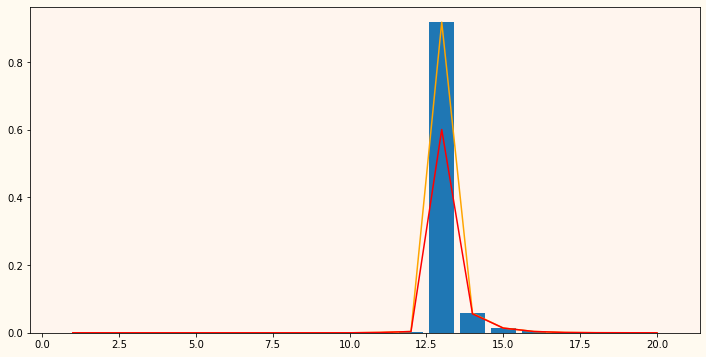

In [8]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

x = [i for i in range (1, num_of_intervals + 1)]
y = interval_count

fig = plt.figure()                      #гистограмма
ax_core = fig.add_subplot()
ax_core.bar(x, y)
ax_core.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    
fig.set_figheight(6)

plt.plot(x, y, color="orange")          #график распределения гистограммы
plt.plot(x, stats.expon.cdf(y), color="red")                     

plt.show()


In [9]:
#Выдвигаем предположение, что случайная величина имеет экспоненциальное распределение.

In [10]:
#Критерий Пирсона

x_empirical = interval_count
x_theoretical = stats.geom.cdf(x, y)

for i in x_theoretical:
    if np.isnan(i):
        i = 0

сhi_squared = 0

for i in range(0, 20):
    if x_empirical[i] != 0:
        сhi_squared += (x_theoretical[i] - x_empirical[i])**2/x_theoretical[i]
    
сhi_squared *= len(num_set)
print(f"Хи-квадрат: {сhi_squared}")

Хи-квадрат: 75024.50733897941


In [11]:
#При данных степенях свободы 9 и альфа 0.01 значение хи-квадрата должно быть менее 21.07

#Полученный хи-квадрат несоизмеримо больше, что говорит о том, что различие с теоретическим вызвано неслучайным явлением

In [12]:
#Несмещенную состоятельную оценку мат ожидания

gen_avg = 0
for i in num_set:
    gen_avg += i

gen_avg /= len(num_set)
print(f"Несмещенная состоятельная оценка мат ожидания: {gen_avg}")

Несмещенная состоятельная оценка мат ожидания: 223559.11149


In [13]:
#Найдем смещенную состоятельную оценку дисперсии

gen_dispersion = 0
for i in num_set:
    gen_dispersion += (i - gen_avg)**2

gen_dispersion /= len(num_set)
gen_dispersion = np.sqrt(gen_dispersion) 

print(f"Смещенная состоятельная оценка дисперсии: {gen_dispersion}")

Смещенная состоятельная оценка дисперсии: 364256.96204006637


In [14]:
#Найдем несмещенную состоятельную оценку дисперсии

point_dispersion = 0
for i in num_set:
    point_dispersion += (i - gen_avg)**2
    
point_dispersion /= len(num_set) - 1
point_dispersion = np.sqrt(point_dispersion) 

print(f"Несмещенная состоятельняа оценка дисперсии: {point_dispersion}")

Несмещенная состоятельняа оценка дисперсии: 364258.78333853633


In [15]:
#Найдем среднее квадратичное отклонение

avg_sq = np.sqrt(point_dispersion)
print(f"Cреднее квадратичное отклонение: {avg_sq}")

Cреднее квадратичное отклонение: 603.5385516589113


In [16]:
#Имеем n = 100000 и доверительную вероятность 0.95 получаем следующее значение распределения Стьюдента

t = 1.9599877077718446

delta = point_dispersion*t/np.sqrt(len(num_set) - 1)
print(f"Дельта: {delta}")

Дельта: 2257.696458867897


In [17]:
#Тогда доверительный интервал для мат ожидания

x_1 = gen_avg - delta
x_2 = gen_avg + delta

print(f"{x_1} <= m_x < {x_2}")

221301.4150311321 <= m_x < 225816.8079488679


In [18]:
#Найдем доверительный интервал для дисперсии

#Хи-квадрат для вероятности (1 - 0.95)/2 и степени свободы 10000 - 1
chi_1 = 9723.732237

#Хи-квадрат для вероятности (1 + 0.95)/ и степени свободы 10000 - 1
chi_2 = 10278.05632

print(f"{len(num_set)*point_dispersion**2/chi_1} <= D_x < {len(num_set)*point_dispersion**2/chi_2}")

1364542523439.6113 <= D_x < 1290948960661.7642
